In [1]:
# importing packages
import pandas as pd
import numpy as np

In [2]:
# define products
products = pd.Series(['A', 'B', 'C']*200).sample(600)

In [3]:
# create data frame of products
df = pd.DataFrame({
    'day': np.random.randint(1,30, size=600),    
    'month': np.random.randint(1,12, size=600),
    'year': 2022,
    'products': products,
    'A': np.random.randint(500, 1000, size=600),
    'B': np.random.randint(1001, 2500, size=600),
    'C': np.random.randint(2501, 5000, size=600)
})

# view dataframe
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,day,month,year,products,A,B,C
0,26,11,2022,A,618,1890,2912
1,15,11,2022,C,841,1895,3124
2,20,7,2022,B,890,1651,3029
3,18,6,2022,B,894,1079,2638
4,23,6,2022,A,547,1654,3778
...,...,...,...,...,...,...,...
595,18,4,2022,A,509,1289,3853
596,7,6,2022,C,937,1061,2812
597,8,4,2022,B,720,1450,3490
598,8,9,2022,B,504,2136,3505


In [4]:
df.insert(3, 'date', pd.to_datetime(df[['day','month','year']], errors='coerce'))
df.head()

,day,month,year,date,products,A,B,C
0,26,11,2022,2022-11-26,A,618,1890,2912
1,15,11,2022,2022-11-15,C,841,1895,3124
2,20,7,2022,2022-07-20,B,890,1651,3029
3,18,6,2022,2022-06-18,B,894,1079,2638
4,23,6,2022,2022-06-23,A,547,1654,3778


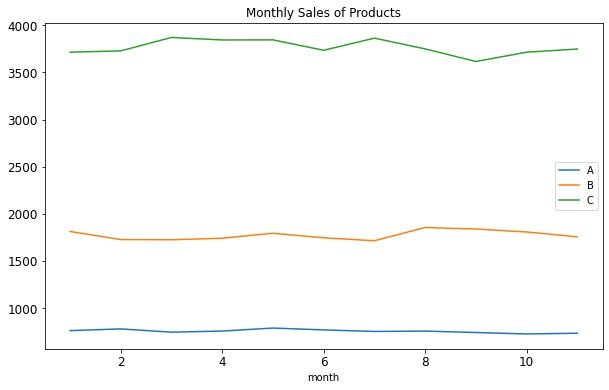

In [5]:
df[['month','A','B','C']].groupby('month').mean().plot(figsize=(10,6), fontsize=12, title='Monthly Sales of Products');

In [6]:
df[['products','A','B','C']].groupby(['products']).mean().style.bar(color='lightgreen')

,A,B,C
products,,,
A,749.245000,1764.300000,3748.355000
B,755.540000,1761.950000,3777.920000
C,757.070000,1787.045000,3780.455000


In [7]:
df.drop(['day','month','year'], axis=1, inplace=True)
df.head()

,date,products,A,B,C
0,2022-11-26,A,618,1890,2912
1,2022-11-15,C,841,1895,3124
2,2022-07-20,B,890,1651,3029
3,2022-06-18,B,894,1079,2638
4,2022-06-23,A,547,1654,3778


In [8]:
df['commision_on_A'] = df.A*0.05
df['commision_on_B'] = df.B*0.125
df['commision_on_C'] = df.C*0.2
df.head()

,date,products,A,B,C,commision_on_A,commision_on_B,commision_on_C
0,2022-11-26,A,618,1890,2912,30.90,236.250,582.4
1,2022-11-15,C,841,1895,3124,42.05,236.875,624.8
2,2022-07-20,B,890,1651,3029,44.50,206.375,605.8
3,2022-06-18,B,894,1079,2638,44.70,134.875,527.6
4,2022-06-23,A,547,1654,3778,27.35,206.750,755.6


In [9]:
df['price_A_minus_commision'] = df.A-df.commision_on_A
df['price_B_minus_commision'] = df.B-df.commision_on_B
df['price_C_minus_commision'] = df.C-df.commision_on_C
df.head()

,date,products,A,B,C,commision_on_A,commision_on_B,commision_on_C,price_A_minus_commision,price_B_minus_commision,price_C_minus_commision
0,2022-11-26,A,618,1890,2912,30.90,236.250,582.4,587.10,1653.750,2329.6
1,2022-11-15,C,841,1895,3124,42.05,236.875,624.8,798.95,1658.125,2499.2
2,2022-07-20,B,890,1651,3029,44.50,206.375,605.8,845.50,1444.625,2423.2
3,2022-06-18,B,894,1079,2638,44.70,134.875,527.6,849.30,944.125,2110.4
4,2022-06-23,A,547,1654,3778,27.35,206.750,755.6,519.65,1447.250,3022.4


In [10]:
df['expense_on_A'] = round(df.price_A_minus_commision*.38, 2)
df['expense_on_B'] = round(df.price_B_minus_commision*.38, 2)
df['expense_on_C'] = round(df.price_C_minus_commision*.38, 2)
df.head()

,date,products,A,B,C,commision_on_A,commision_on_B,commision_on_C,price_A_minus_commision,price_B_minus_commision,price_C_minus_commision,expense_on_A,expense_on_B,expense_on_C
0,2022-11-26,A,618,1890,2912,30.90,236.250,582.4,587.10,1653.750,2329.6,223.10,628.42,885.25
1,2022-11-15,C,841,1895,3124,42.05,236.875,624.8,798.95,1658.125,2499.2,303.60,630.09,949.70
2,2022-07-20,B,890,1651,3029,44.50,206.375,605.8,845.50,1444.625,2423.2,321.29,548.96,920.82
3,2022-06-18,B,894,1079,2638,44.70,134.875,527.6,849.30,944.125,2110.4,322.73,358.77,801.95
4,2022-06-23,A,547,1654,3778,27.35,206.750,755.6,519.65,1447.250,3022.4,197.47,549.96,1148.51


In [11]:
df['net_price_A'] = round(df.price_A_minus_commision - df.expense_on_A, 2)
df['net_price_B'] = round(df.price_B_minus_commision - df.expense_on_B, 2) 
df['net_price_C'] = round(df.price_C_minus_commision - df.expense_on_C, 2) 
df.head()

,date,products,A,B,C,commision_on_A,commision_on_B,commision_on_C,price_A_minus_commision,price_B_minus_commision,price_C_minus_commision,expense_on_A,expense_on_B,expense_on_C,net_price_A,net_price_B,net_price_C
0,2022-11-26,A,618,1890,2912,30.90,236.250,582.4,587.10,1653.750,2329.6,223.10,628.42,885.25,364.00,1025.33,1444.35
1,2022-11-15,C,841,1895,3124,42.05,236.875,624.8,798.95,1658.125,2499.2,303.60,630.09,949.70,495.35,1028.03,1549.50
2,2022-07-20,B,890,1651,3029,44.50,206.375,605.8,845.50,1444.625,2423.2,321.29,548.96,920.82,524.21,895.66,1502.38
3,2022-06-18,B,894,1079,2638,44.70,134.875,527.6,849.30,944.125,2110.4,322.73,358.77,801.95,526.57,585.36,1308.45
4,2022-06-23,A,547,1654,3778,27.35,206.750,755.6,519.65,1447.250,3022.4,197.47,549.96,1148.51,322.18,897.29,1873.89


### Formula for Break Even Analysis
The formula for break even analysis is as follows:

$${{Break even quantity} = \frac{Fixed costs}{(Sales price per unit – Variable cost per unit)}}$$

Where:
* `Fixed costs` are costs that do not change with varying output (e.g., salary, rent, building machinery).
* `Sales price per unit` is the selling price (unit selling price) per unit.
* `Variable cost per unit` is the variable costs incurred to create a unit.